In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
# from sklearn.model_selection import train_test_split 

In [2]:
dataset_dir = '../PySpark/ETL_result'
dir_contents = os.listdir(dataset_dir)
dir_contents.sort()
for f in dir_contents:
	print(f) if f.endswith('.csv') else None

part-00000-26005234-573b-40dd-bc2c-cfeebc247dce-c000.csv
part-00001-26005234-573b-40dd-bc2c-cfeebc247dce-c000.csv
part-00002-26005234-573b-40dd-bc2c-cfeebc247dce-c000.csv
part-00003-26005234-573b-40dd-bc2c-cfeebc247dce-c000.csv
part-00004-26005234-573b-40dd-bc2c-cfeebc247dce-c000.csv
part-00005-26005234-573b-40dd-bc2c-cfeebc247dce-c000.csv
part-00006-26005234-573b-40dd-bc2c-cfeebc247dce-c000.csv
part-00007-26005234-573b-40dd-bc2c-cfeebc247dce-c000.csv


In [3]:
twitter_col = ['account_id', 'followers_count', 'following_count', \
    'post_count', 'listed_count', 'active_date']
df = pd.DataFrame(columns = twitter_col)

for f in dir_contents:
    if f.endswith('.csv'):
        df1 = pd.read_csv(dataset_dir + '/' + f, names = twitter_col)
        df = pd.concat([df, df1])

In [4]:
df.isnull().sum()

account_id         50
followers_count     3
following_count     4
post_count          2
listed_count        1
active_date        81
dtype: int64

In [5]:
df.dropna(subset = ['account_id'], inplace=True)
df['active_date'].fillna(df['active_date'].mean(), inplace=True)
df.isnull().sum()

account_id         0
followers_count    0
following_count    0
post_count         0
listed_count       0
active_date        0
dtype: int64

In [6]:
df.head()

,account_id,followers_count,following_count,post_count,listed_count,active_date
0,58633.0,4155.0,4395.0,12823,72,2470.0
1,60453.0,438.0,757.0,515,9,2448.0
2,72373.0,4295.0,4728.0,16282,166,2469.0
3,658723.0,559.0,15.0,5991,25,2443.0
4,790886.0,877.0,415.0,11320,42,2408.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134978 entries, 0 to 8087
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   account_id       134978 non-null  float64
 1   followers_count  134978 non-null  float64
 2   following_count  134978 non-null  float64
 3   post_count       134978 non-null  object 
 4   listed_count     134978 non-null  object 
 5   active_date      134978 non-null  float64
dtypes: float64(4), object(2)
memory usage: 7.2+ MB


In [8]:
features = df.iloc[:,1:]
print(features.info())
print(features.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134978 entries, 0 to 8087
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   followers_count  134978 non-null  float64
 1   following_count  134978 non-null  float64
 2   post_count       134978 non-null  object 
 3   listed_count     134978 non-null  object 
 4   active_date      134978 non-null  float64
dtypes: float64(3), object(2)
memory usage: 6.2+ MB
None
   followers_count  following_count post_count listed_count  active_date
0           4155.0           4395.0      12823           72       2470.0
1            438.0            757.0        515            9       2448.0
2           4295.0           4728.0      16282          166       2469.0
3            559.0             15.0       5991           25       2443.0
4            877.0            415.0      11320           42       2408.0


In [9]:
features_norm = Normalizer().fit_transform(features)
features_norm = pd.DataFrame(features_norm, columns = list(features.columns))
print('Normalized Features')
print(features_norm.head())

Normalized Features
   followers_count  following_count  post_count  listed_count  active_date
0         0.288712         0.305388    0.891012      0.005003     0.171629
1         0.165278         0.285652    0.194334      0.003396     0.923747
2         0.243146         0.267658    0.921745      0.009397     0.139773
3         0.086078         0.002310    0.922526      0.003850     0.376186
4         0.075513         0.035733    0.974689      0.003616     0.207337


In [10]:
# X_train, X_test = train_test_split(features_norm, test_size=0.2)
# X_train = X_train.iloc[:,1:]
# X_test = X_test.iloc[:,1:]
# print(X_train.shape)
# print(X_test.shape)
# print(X_train.head())

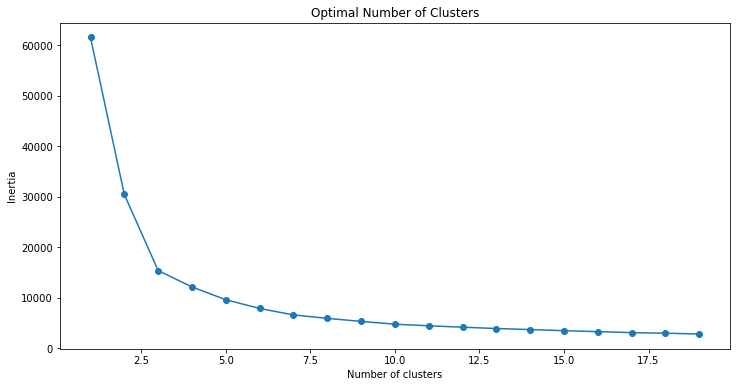

In [11]:
# sum of square distances. insertia
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(features_norm)
    SSE.append(kmeans.inertia_)

# sse elbow plot
sse_df = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(sse_df['Cluster'], sse_df['SSE'], marker='o')
plt.title('Optimal Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

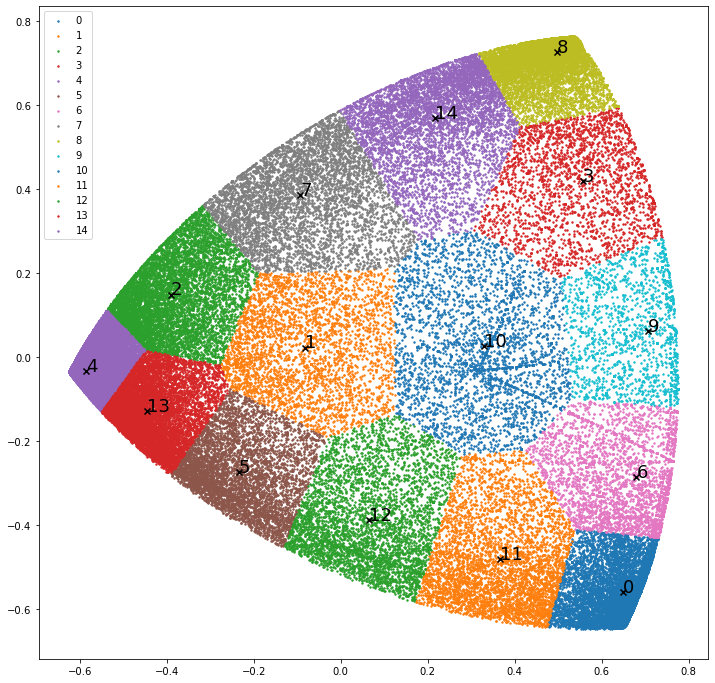

In [18]:
# use PCA to convert dimension to 2
pca = PCA(2)
data = pca.fit_transform(features_norm)

# fitting multiple k-means algorithms
k = 15
model = KMeans(n_clusters = k, init='k-means++')
model.fit(data)
pred = model.predict(data)
uniq = np.unique(pred)

centers = np.array(model.cluster_centers_)

# plot clusters
plt.figure(figsize=(12,12))

for i in uniq:
   plt.annotate(i, (centers[:,0][i], centers[:,1][i]), fontsize=18)
   plt.scatter(data[pred == i , 0], data[pred == i , 1], s = 2, label = i)
plt.scatter(centers[:,0], centers[:,1], marker='x', color='k')
plt.legend()
plt.show()

In [23]:
frame = features_norm.copy()
frame['cluster'] = pred
print(frame['cluster'].value_counts())
print(frame.head())

4     38271
0     15756
8     13503
13    10439
2      7805
6      6687
14     5771
7      5326
5      5243
9      4970
11     4774
3      4509
12     4434
10     4025
1      3465
Name: cluster, dtype: int64
   followers_count  following_count  post_count  listed_count  active_date  \
0         0.288712         0.305388    0.891012      0.005003     0.171629   
1         0.165278         0.285652    0.194334      0.003396     0.923747   
2         0.243146         0.267658    0.921745      0.009397     0.139773   
3         0.086078         0.002310    0.922526      0.003850     0.376186   
4         0.075513         0.035733    0.974689      0.003616     0.207337   

   cluster  
0        3  
1       13  
2        3  
3       14  
4        8  
